# Analise da serie temporal 01 - Cotacao do Dolar em relacao ao Real

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

# imports de modulos que estao definidos dentro do projeto
import arima
import timeseries

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_original = pd.read_csv('../output/timeseries01.csv', header=0, names=['date', 'rate'])

#arima.print_dataframe_info(df_original)

## Obtendo a serie temporal DIARIA

In [3]:
df_daily = df_original.copy()
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily = df_daily.set_index('date')

#arima.print_dataframe_info(df_daily)

In [4]:
# esse comando preenche as datas que estao faltando
df_daily = df_daily.resample('D').ffill()

#arima.print_dataframe_info(df_daily)

In [5]:
df_daily = df_daily.replace(0, np.nan)
df_daily = df_daily.replace('.', np.nan)

print(df_daily.isnull().values.any())

True


In [6]:
df_daily = df_daily.fillna(method='ffill')

print(df_daily.isnull().values.any())

False


In [7]:
df_daily['rate'] = pd.to_numeric(df_daily['rate'])

#arima.print_dataframe_info(df_daily)

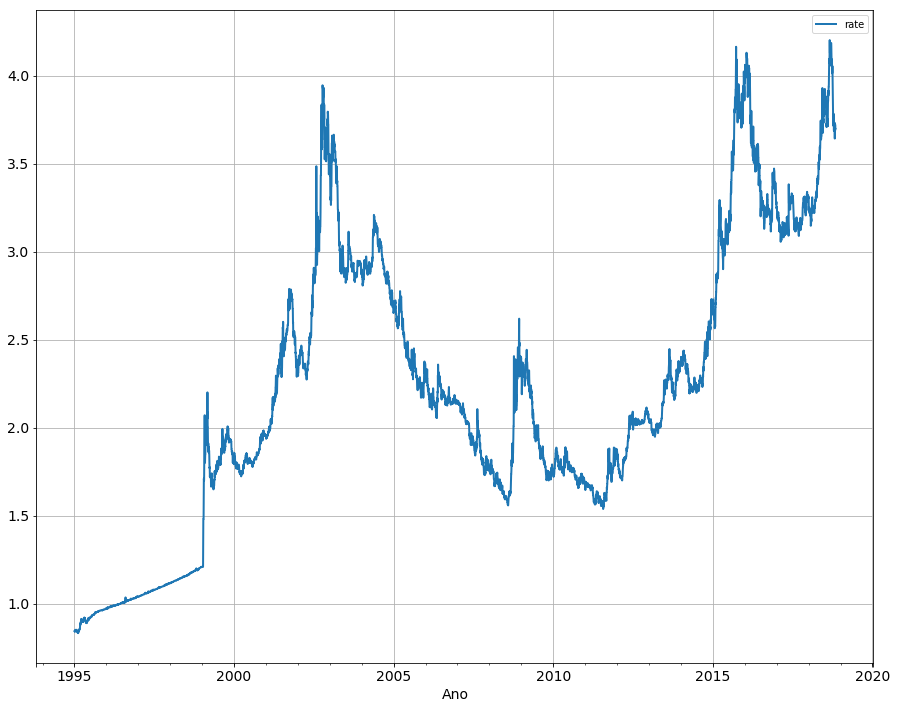

In [8]:
timeseries.plot_timeserie(df_daily)

In [9]:
# removo o periodo inicial da serie temporal
# tem um padrao que nao se repete
# estou trabalhando com dados de 18 anos
df_daily = df_daily['2000-11-03':]

#arima.print_dataframe_info(df_daily)

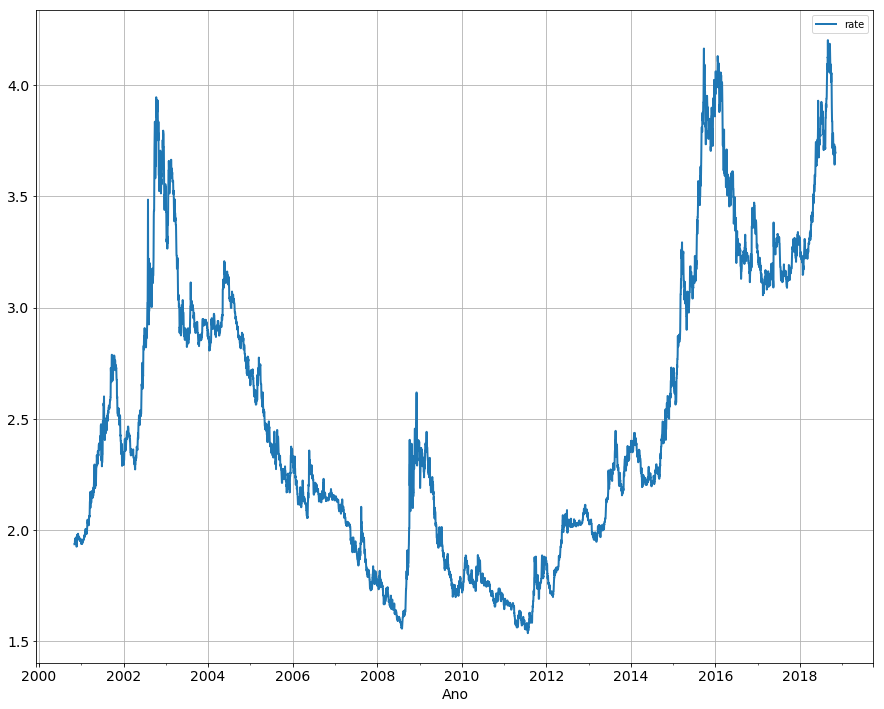

In [10]:
timeseries.plot_timeserie(df_daily)

## Obtendo a serie temporal SEMANAL

In [11]:
# transforma numa serie temporal semanal com o valor da sexta-feira
df_weekly = df_daily.resample('W-FRI')
df_weekly = df_weekly.mean()

#arima.print_dataframe_info(df_weekly)

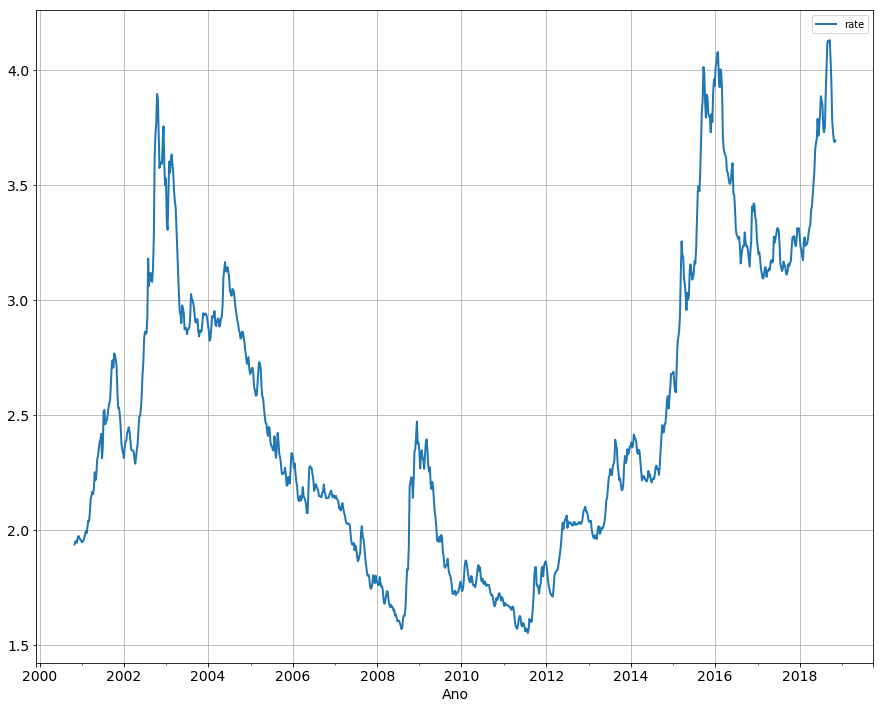

In [12]:
timeseries.plot_timeserie(df_weekly)

## Obtendo a serie temporal do dia 15 e do fim do mes

In [17]:
# transforma numa serie temporal do dia 15 e do fim do mes
df_15 = df_daily.resample('SM')
df_15 = df_15.mean()

arima.print_dataframe_info(df_15)

SHAPE: (433, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

                rate
date                
2000-10-31  1.948458
2000-11-15  1.952733
2000-11-30  1.971147
2000-12-15  1.957750
2000-12-31  1.947667


##########################################################################################
TAIL 

                rate
date                
2018-08-31  4.127587
2018-09-15  4.089180
2018-09-30  3.845753
2018-10-15  3.698194
2018-10-31  3.702250


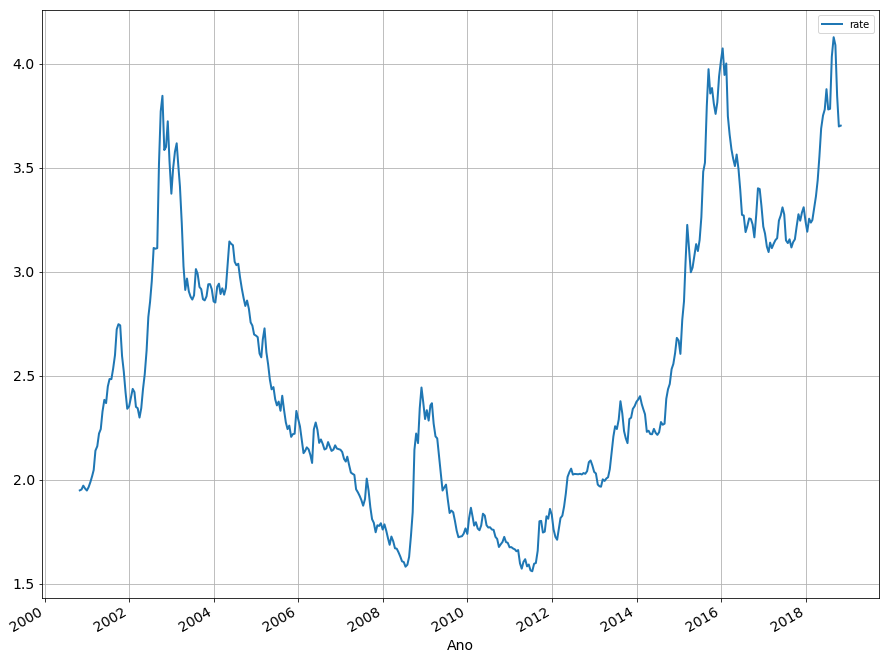

In [14]:
timeseries.plot_timeserie(df_15)

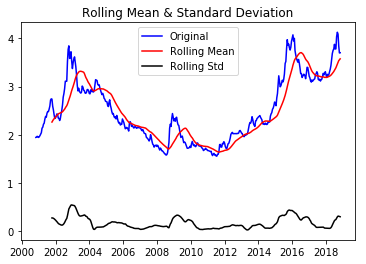

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.052807) > Critical Value 1 (-3.446129)
[FALHA] Test Statistic (-1.052807) > Critical Value 5 (-2.868496)
[FALHA] Test Statistic (-1.052807) > Critical Value 10 (-2.570475)
[FALHA] p-value (0.733520) > 0.05


In [15]:
timeseries.check_stationarity(df_15, window=24)

In [16]:
result = seasonal_decompose(df_15, model='additive')
result.plot()
plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

## Obtendo a serie temporal MENSAL

In [ ]:
df_monthly = df_daily.resample('M')
df_monthly = df_monthly.mean()

#arima.print_dataframe_info(df_monthly)

In [ ]:
timeseries.plot_timeserie(df_monthly)

In [ ]:
timeseries.check_stationarity(df_monthly, window=12)

In [ ]:
result = seasonal_decompose(df_monthly, model='additive')
result.plot()
plt.show()